## Setup

In [1]:
using PyCall
using SoleAudio

af = pyimport("audioflux")
librosa = pyimport("librosa")
scipy= pyimport("scipy")
np = pyimport("numpy")

sr_src = 16000
x, sr = librosa.load("common_voice_en_23616312.wav", sr=sr_src, mono=true)
FFTLength = 256
mel_num = 26

# convert to Float64
x = Float64.(x)

96001-element Vector{Float64}:
 -0.035614013671875
  0.00787353515625
  0.045684814453125
  0.064483642578125
  0.051544189453125
  0.032012939453125
  0.0406494140625
  0.068817138671875
  0.07696533203125
  0.041259765625
  ⋮
  0.0050048828125
  0.005462646484375
  0.0059814453125
  0.00592041015625
  0.00543212890625
  0.005126953125
  0.004852294921875
  0.00469970703125
  0.000518798828125

# Mel spectrogram

### SoleAudio

In [2]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)

data.mel_spectrogram

749×26 adjoint(::Matrix{Float64}) with eltype Float64:
 0.00145865   0.0120549    0.0110139    …  3.55702e-6   7.8955e-7
 0.000968087  0.00609163   0.00527363      2.13445e-6   2.85168e-7
 0.000318082  0.00310803   0.00564505      1.4429e-6    1.94039e-7
 0.00202778   0.00941625   0.00808557      8.75643e-7   2.60428e-7
 0.00247062   0.012314     0.0114512       4.85245e-7   6.82688e-8
 0.00129579   0.00791248   0.00768026   …  4.9368e-7    2.2223e-7
 0.000398164  0.00216038   0.00425545      2.16657e-7   2.57794e-7
 0.000323854  0.000603713  0.00109851      3.74373e-7   1.87649e-7
 0.000573709  0.00163135   0.00169437      6.94803e-7   3.83215e-7
 0.000425578  0.0021829    0.00154443      1.13672e-6   1.16356e-7
 ⋮                                      ⋱               ⋮
 0.00082649   0.00871576   0.0119652    …  6.79841e-7   1.10627e-7
 0.000145481  0.00466538   0.00710006      4.53626e-7   1.76455e-8
 0.0020231    0.0153771    0.016203        8.08921e-8   6.90241e-9
 0.00250308   0.01

### Matlab

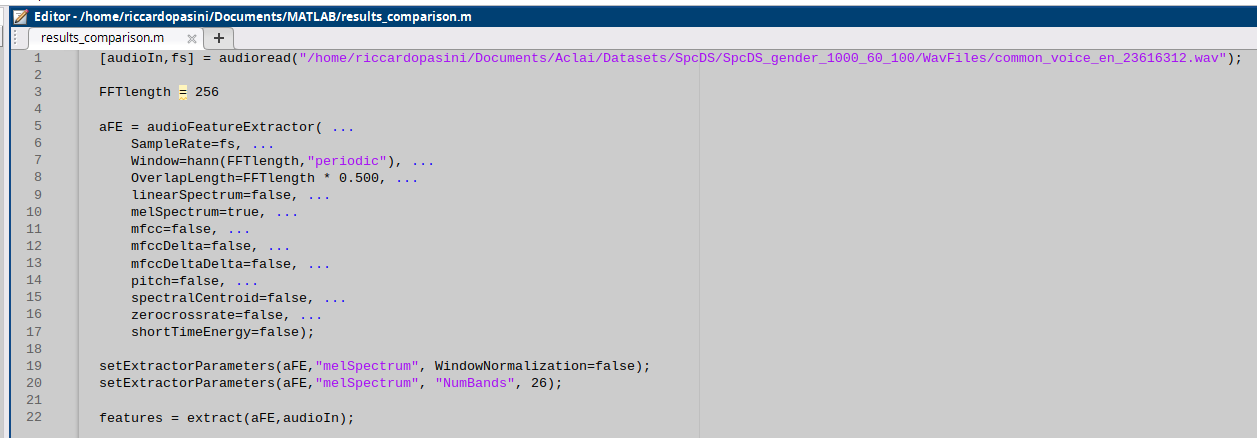

Results cutted to match jupiter view

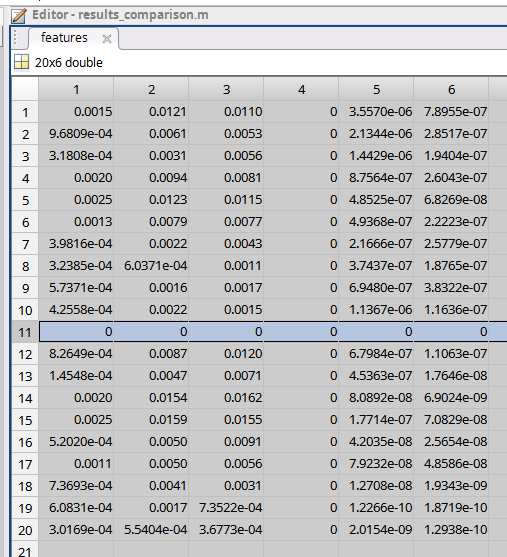

### AudioFlux

In [3]:
m_bft_obj = af.BFT(
    num=mel_num,
    radix2_exp=Int64(log2(FFTLength)),
    samplate=sr,
    low_fre=0.0,
    high_fre=sr / 2,
    window_type=af.type.WindowType.HANN,
    slide_length=round(Integer, FFTLength * 0.500),
    scale_type=af.type.SpectralFilterBankScaleType.MEL,
    style_type=af.type.SpectralFilterBankStyleType.SLANEY,
    normal_type=af.type.SpectralFilterBankNormalType.BAND_WIDTH,
    data_type=af.type.SpectralDataType.POWER,
    is_reassign=false
)
m_spec_arr = m_bft_obj.bft(x, result_type=1)
m_spec_arr'

749×26 adjoint(::Matrix{Float32}) with eltype Float32:
 0.00145865   0.0120549    0.0110139    …  3.55702f-6   7.89531f-7
 0.000968089  0.00609163   0.00527364      2.13444f-6   2.85173f-7
 0.000318082  0.00310803   0.00564505      1.4429f-6    1.94036f-7
 0.00202778   0.00941625   0.00808557      8.75639f-7   2.60425f-7
 0.00247062   0.012314     0.0114512       4.8524f-7    6.8268f-8
 0.0012958    0.00791248   0.00768027   …  4.93677f-7   2.22229f-7
 0.000398164  0.00216038   0.00425545      2.16658f-7   2.57794f-7
 0.000323854  0.000603713  0.00109852      3.74373f-7   1.87649f-7
 0.000573709  0.00163135   0.00169437      6.94803f-7   3.83215f-7
 0.000425578  0.0021829    0.00154443      1.13672f-6   1.16355f-7
 ⋮                                      ⋱               ⋮
 0.000826491  0.00871577   0.0119652    …  6.79836f-7   1.10626f-7
 0.000145482  0.00466538   0.00710006      4.53623f-7   1.76453f-8
 0.0020231    0.0153771    0.016203        8.08924f-8   6.90225f-9
 0.00250308   0.0

# Mfcc 

### SoleAudio
log10 normalization matlab like

In [2]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
    # mfcc
    num_coeffs = 13,
    normalization_type = :normal,
    rectification = :log,
    log_energy_pos = :none,
    delta_window_length = 9
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)
_mfcc(data, setup)

data.mfcc_coeffs

749×13 adjoint(::Matrix{Float64}) with eltype Float64:
 -15.3165   5.2289   -5.30384   …   0.127033   -0.568815    -0.162314
 -16.3883   5.85133  -5.61507       0.0665725  -0.422973    -0.250987
 -17.9529   6.33444  -5.61826       0.354477   -0.677017    -0.220679
 -19.9426   6.95132  -4.25116       0.794939   -0.567001    -0.200188
 -22.0318   7.74248  -3.72932       0.408677    0.00621792  -0.389695
 -23.5345   7.35256  -3.70665   …  -0.0232314  -0.26227     -0.322064
 -25.664    7.64622  -3.72862       0.0357851  -0.388704     0.0762135
 -28.1875   7.40039  -3.13284       0.418804   -0.095727     0.316031
 -29.0172   6.80086  -2.09107      -0.0184889  -0.0896642    0.0960713
 -31.1354   5.86285  -1.35099      -0.289847    0.205307    -0.871076
   ⋮                            ⋱   ⋮                       
 -23.4803   7.18781  -4.00703   …  -0.0154496  -0.597973     0.0708924
 -24.5223   7.26325  -4.39301      -0.0929925  -0.393874     0.0100958
 -25.4817   8.72281  -4.01924       0.03

### Matlab

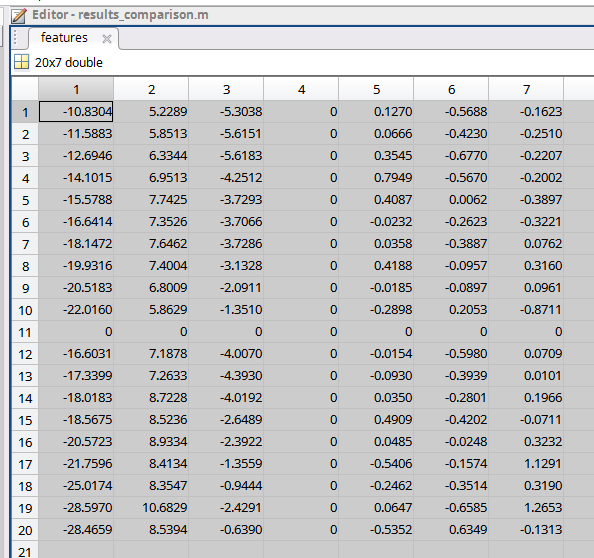

### AudioFlux

In [3]:
m_bft_obj = af.BFT(
    num=mel_num,
    radix2_exp=Int64(log2(FFTLength)),
    samplate=sr,
    low_fre=0.0,
    high_fre=sr / 2,
    window_type=af.type.WindowType.HANN,
    slide_length=round(Integer, FFTLength * 0.500),
    scale_type=af.type.SpectralFilterBankScaleType.MEL,
    style_type=af.type.SpectralFilterBankStyleType.SLANEY,
    normal_type=af.type.SpectralFilterBankNormalType.BAND_WIDTH,
    data_type=af.type.SpectralDataType.POWER,
    is_reassign=false
)
m_spec_arr = m_bft_obj.bft(x, result_type=1)

m_xxcc_obj = af.XXCC(num=m_bft_obj.num)
m_xxcc_obj.set_time_length(time_length=length(m_spec_arr[2, :]))
m_spectral_obj = af.Spectral(
    num=m_bft_obj.num,
    fre_band_arr=m_bft_obj.get_fre_band_arr())
m_n_time = length(m_spec_arr[2, :])
m_spectral_obj.set_time_length(m_n_time)
m_energy_arr = m_spectral_obj.energy(m_spec_arr)
mfcc_arr, m_delta_arr, m_deltadelta_arr = m_xxcc_obj.xxcc_standard(
    m_spec_arr,
    m_energy_arr,
    cc_num=13,
    delta_window_length=9,
    energy_type=af.type.CepstralEnergyType.IGNORE,
    rectify_type=af.type.CepstralRectifyType.LOG
)
mfcc_arr'

749×13 adjoint(::Matrix{Float32}) with eltype Float32:
 -10.8304  5.2289   -5.30384    …   0.127029   -0.568813    -0.162315
 -11.5883  5.85133  -5.61507        0.0665706  -0.422973    -0.250984
 -12.6947  6.33445  -5.61826        0.354473   -0.677015    -0.220679
 -14.1015  6.95132  -4.25116        0.794936   -0.567       -0.200186
 -15.5788  7.74248  -3.72932        0.408674    0.00621804  -0.389692
 -16.6414  7.35256  -3.70665    …  -0.0232343  -0.26227     -0.322062
 -18.1472  7.64622  -3.72862        0.0357823  -0.388706     0.076217
 -19.9316  7.40039  -3.13284        0.418801   -0.0957278    0.316034
 -20.5183  6.80086  -2.09107       -0.018492   -0.0896642    0.0960749
 -22.016   5.86285  -1.351         -0.28985     0.205307    -0.871073
   ⋮                            ⋱   ⋮                       
 -16.6031  7.18781  -4.00703    …  -0.0154497  -0.597975     0.0708963
 -17.3399  7.26325  -4.39301       -0.0929959  -0.393873     0.0100968
 -17.9867  8.67824  -3.97491        0.071

### SoleAudio
log10 normalization audioflux like

In [4]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
    # mfcc
    num_coeffs = 13,
    normalization_type = :dithered,
    rectification = :log,
    log_energy_pos = :none,
    delta_window_length = 9
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)
_mfcc(data, setup)

data.mfcc_coeffs

749×13 adjoint(::Matrix{Float64}) with eltype Float64:
 -15.3165  5.2289   -5.30384    …   0.127033   -0.568815    -0.162314
 -16.3883  5.85133  -5.61507        0.0665725  -0.422973    -0.250987
 -17.9529  6.33444  -5.61826        0.354477   -0.677017    -0.220679
 -19.9426  6.95132  -4.25116        0.794939   -0.567001    -0.200188
 -22.0318  7.74248  -3.72932        0.408677    0.00621792  -0.389695
 -23.5345  7.35256  -3.70665    …  -0.0232314  -0.26227     -0.322064
 -25.664   7.64622  -3.72862        0.0357851  -0.388704     0.0762135
 -28.1875  7.40039  -3.13284        0.418804   -0.095727     0.316031
 -29.0172  6.80086  -2.09107       -0.0184889  -0.0896642    0.0960713
 -31.1354  5.86285  -1.35099       -0.289847    0.205307    -0.871076
   ⋮                            ⋱   ⋮                       
 -23.4803  7.18781  -4.00703    …  -0.0154496  -0.597973     0.0708924
 -24.5223  7.26325  -4.39301       -0.0929925  -0.393874     0.0100958
 -25.437   8.67824  -3.97491        0.07

# Delta

### SoleAudio
filt(b, 1.0, x)     #:matlab setting

In [18]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
    # mfcc
    num_coeffs = 13,
    normalization_type = :normal,
    rectification = :log,
    log_energy_pos = :none,
    delta_window_length = 9,
    delta_matrix = :standard
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)
_mfcc(data, setup)

data.mfcc_delta

749×13 Matrix{Float64}:
 -1.44405  0.697187   -0.707178    0.109795   …  -0.075842     -0.0216419
 -2.62814  1.30307    -1.27906     0.160877      -0.113278     -0.0496963
 -3.57347  1.77832    -1.6642      0.171909      -0.170487     -0.0653435
 -4.28323  2.12467    -1.67978     0.227115      -0.190461     -0.0709025
 -4.71991  2.3448     -1.48408     0.256121      -0.115105     -0.0950562
 -4.77898  2.25486    -1.16104     0.196867   …  -0.0757543    -0.0972027
 -4.4841   1.95899    -0.717382    0.0472377     -0.0445196    -0.03551
 -3.82224  1.37547    -0.0699976  -0.175125       0.0387355     0.0556178
 -2.57421  0.465329    0.820717   -0.299177       0.12599       0.106883
 -2.64701  0.0749087   0.99584    -0.219263       0.16076      -0.00105873
  ⋮                                           ⋱                
 -1.35179  1.23173     0.277761    0.458554   …  -0.157449     -0.125994
 -1.52032  1.23428     0.10237     0.694914      -0.124234     -0.126549
 -1.62777  1.32244     0.061

### Matlab

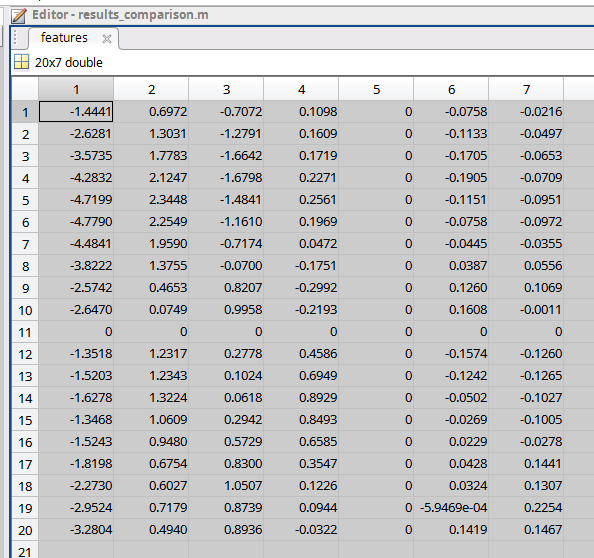

### AudioFlux

In [34]:
m_bft_obj = af.BFT(
    num=mel_num,
    radix2_exp=Int64(log2(FFTLength)),
    samplate=sr,
    low_fre=0.0,
    high_fre=sr / 2,
    window_type=af.type.WindowType.HANN,
    slide_length=round(Integer, FFTLength * 0.500),
    scale_type=af.type.SpectralFilterBankScaleType.MEL,
    style_type=af.type.SpectralFilterBankStyleType.SLANEY,
    normal_type=af.type.SpectralFilterBankNormalType.BAND_WIDTH,
    data_type=af.type.SpectralDataType.POWER,
    is_reassign=false
)
m_spec_arr = m_bft_obj.bft(x, result_type=1)

m_xxcc_obj = af.XXCC(num=m_bft_obj.num)
m_xxcc_obj.set_time_length(time_length=length(m_spec_arr[2, :]))
m_spectral_obj = af.Spectral(
    num=m_bft_obj.num,
    fre_band_arr=m_bft_obj.get_fre_band_arr())
m_n_time = length(m_spec_arr[2, :])
m_spectral_obj.set_time_length(m_n_time)
m_energy_arr = m_spectral_obj.energy(m_spec_arr)
mfcc_arr, m_delta_arr, m_deltadelta_arr = m_xxcc_obj.xxcc_standard(
    m_spec_arr,
    m_energy_arr,
    cc_num=13,
    delta_window_length=9,
    energy_type=af.type.CepstralEnergyType.IGNORE,
    rectify_type=af.type.CepstralRectifyType.LOG
)
m_delta_arr'

749×13 adjoint(::Matrix{Float32}) with eltype Float32:
 -1.44405  -0.385852  -0.906314  -0.433008   …   0.0352413    0.214375
 -1.5451   -0.378652  -0.936095  -0.479164       0.145224     0.29395
 -1.69262  -0.424872  -0.961967  -0.504571       0.193401     0.373259
 -1.8802   -0.48331   -0.811791  -0.314929       0.115897     0.303432
 -2.07717  -0.525549  -0.761581  -0.256239       0.134408     0.287062
 -2.21885  -0.683799  -0.868391  -0.373694   …  -0.0159801    0.0851939
 -2.41962  -0.795221  -0.942338  -0.481501       0.0714279    0.182701
 -2.65755  -1.00644   -1.00645   -0.573897       0.20853      0.2443
 -2.73577  -1.14505   -0.966608  -0.453331       0.0468605    0.105887
 -2.93547  -1.41989   -1.06158   -0.428478      -0.0792202   -0.126282
  ⋮                                          ⋱               
 -2.21375  -0.701934  -0.922363  -0.204092   …  -0.0913758    0.323789
 -2.31199  -0.765558  -1.0154    -0.273089      -0.0135611    0.43273
 -2.39823  -0.641572  -0.861278  -

### SoleAudio
filt(b, 1.0, x')'   #:audioflux setting (and audioflux log10 mfcc normalization)

In [4]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
    # mfcc
    num_coeffs = 13,
    normalization_type = :dithered,
    rectification = :log,
    log_energy_pos = :none,
    delta_window_length = 9,
    delta_matrix = :transposed
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)
_mfcc(data, setup)

data.mfcc_delta

749×13 adjoint(::Matrix{Float64}) with eltype Float64:
 -1.44405  -0.385852  -0.906314  -0.433008   …   0.0352415    0.214375
 -1.5451   -0.378652  -0.936096  -0.479164       0.145224     0.29395
 -1.69262  -0.424872  -0.961967  -0.504571       0.193402     0.373259
 -1.8802   -0.48331   -0.811791  -0.31493        0.115897     0.303432
 -2.07717  -0.525549  -0.761581  -0.256239       0.134409     0.287062
 -2.21885  -0.683799  -0.868391  -0.373694   …  -0.0159798    0.0851939
 -2.41962  -0.795222  -0.942339  -0.481501       0.0714283    0.182701
 -2.65755  -1.00644   -1.00645   -0.573897       0.20853      0.2443
 -2.73577  -1.14504   -0.966608  -0.45333        0.0468607    0.105887
 -2.93547  -1.41989   -1.06158   -0.428478      -0.07922     -0.126282
  ⋮                                          ⋱               
 -2.21375  -0.701934  -0.922363  -0.204092   …  -0.0913752    0.323789
 -2.31199  -0.765558  -1.0154    -0.27309       -0.0135607    0.432731
 -2.39823  -0.641572  -0.861278  

# Log Energy

### SoleAudio

In [33]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
    # mfcc
    num_coeffs = 13,
    rectification = :log,
    log_energy_source = :standard,
    log_energy_pos = :replace,
    delta_window_length = 9
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)
_mfcc(data, setup)

data.mfcc_coeffs[:,1]

749-element Vector{Float64}:
  1.8942457361703688
  1.7725620414109489
  1.4847075362769575
  0.6781487996717441
  0.11152738127840268
 -0.5164502379268161
 -1.018288094696488
 -1.444601183359552
 -2.6547787588919896
 -3.7244744173552213
  ⋮
 -0.4864692853958704
 -0.46439396609920774
 -0.3862480011983384
 -0.40933708590704054
 -0.6182448622191861
 -1.550190885472392
 -2.537770870460166
 -4.167422460084754
 -4.750178922796984

### AudioFlux

In [29]:
m_bft_obj = af.BFT(
    num=mel_num,
    radix2_exp=Int64(log2(FFTLength)),
    samplate=sr,
    low_fre=0.0,
    high_fre=sr / 2,
    window_type=af.type.WindowType.HANN,
    slide_length=round(Integer, FFTLength * 0.500),
    scale_type=af.type.SpectralFilterBankScaleType.MEL,
    style_type=af.type.SpectralFilterBankStyleType.SLANEY,
    normal_type=af.type.SpectralFilterBankNormalType.BAND_WIDTH,
    data_type=af.type.SpectralDataType.POWER,
    is_reassign=false
)
m_spec_arr = m_bft_obj.bft(x, result_type=1)

m_xxcc_obj = af.XXCC(num=m_bft_obj.num)
m_xxcc_obj.set_time_length(time_length=length(m_spec_arr[2, :]))
m_spectral_obj = af.Spectral(
    num=m_bft_obj.num,
    fre_band_arr=m_bft_obj.get_fre_band_arr())
m_n_time = length(m_spec_arr[2, :])
m_spectral_obj.set_time_length(m_n_time)
m_energy_arr = m_spectral_obj.energy(m_spec_arr)
mfcc_arr, m_delta_arr, m_deltadelta_arr = m_xxcc_obj.xxcc_standard(
    m_spec_arr,
    m_energy_arr,
    cc_num=13,
    delta_window_length=9,
    energy_type=af.type.CepstralEnergyType.REPLACE,
    rectify_type=af.type.CepstralRectifyType.LOG
)
mfcc_arr'[:,1]

749-element Vector{Float32}:
  -4.1348476
  -4.139962
  -4.627077
  -5.751109
  -6.269056
  -8.866862
  -9.523477
 -10.657206
 -12.410045
 -14.690201
   ⋮
  -8.171363
  -7.924935
  -7.570081
  -7.194676
  -7.62654
  -9.508778
 -13.352563
 -14.774373
 -16.012177

### SoleAudio with modded log energy
from Mel Spectrogram instead after windowing like Matlab

In [32]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
    # mfcc
    num_coeffs = 13,
    rectification = :log,
    log_energy_source = :mfcc,
    log_energy_pos = :replace,
    delta_window_length = 9
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)
_mfcc(data, setup)

data.mfcc_coeffs[:,1]

749-element Vector{Float64}:
  -4.1348478257922405
  -4.139962264017667
  -4.627077409530931
  -5.751108719018592
  -6.269055648102423
  -8.866861613287366
  -9.523476467139837
 -10.657205177183954
 -12.410044521735912
 -14.690200426475807
   ⋮
  -8.171362964552106
  -7.92493455371075
  -7.57008110420328
  -7.194675903894998
  -7.626540047321812
  -9.50877744703531
 -13.35256221377284
 -14.774372290038617
 -16.012175103874085

# Linear spectrogram

## SoleAudio
spectrum_type=:power

In [6]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=true,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:magnitude, # :power, :magnitude
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
lin_spectrogram(data, setup)

data.lin_spectrogram

749×129 adjoint(::Matrix{Float64}) with eltype Float64:
 0.000868868  0.000766353  0.0100453   …  9.53962e-7  8.79497e-7  5.10462e-7
 0.000288084  0.00180198   0.00751423     1.56796e-6  8.29408e-7  9.69558e-8
 0.000836363  0.00192901   0.00296501     2.71894e-6  2.39516e-6  1.48498e-6
 1.8905e-5    0.00316069   0.010322       2.93427e-6  3.88961e-7  5.71769e-7
 0.000324071  0.00245988   0.0123419      1.30723e-6  3.28067e-7  1.50816e-7
 0.0011668    0.000616651  0.00949539  …  7.16337e-7  3.30841e-7  9.65154e-9
 0.00134441   0.00228025   0.00300214     1.15182e-6  6.98383e-7  2.54209e-7
 0.000940175  0.00190724   0.00308324     1.09605e-6  1.03376e-6  9.42579e-7
 0.000121415  0.00223517   0.00470803     1.53398e-6  4.77838e-7  5.49554e-7
 3.10206e-5   0.000817097  0.0052551      3.99932e-6  1.54388e-6  1.323e-7
 ⋮                                     ⋱                          
 0.000440618  0.000684867  0.00752827  …  6.31363e-7  1.24577e-6  4.25984e-7
 0.000448068  0.000150443  0.003

## Audioflux

In [4]:
s_obj = af.BFT(
    num=mel_num,
    radix2_exp=Int64(log2(FFTLength)),
    samplate=sr,
    high_fre=sr / 2,
    window_type=af.type.WindowType.HANN,
    slide_length=round(Integer, FFTLength * 0.500),
    scale_type=af.type.SpectralFilterBankScaleType.LINEAR,
    data_type=af.type.SpectralDataType.MAG,
)
s_spec_arr = s_obj.bft(x)
s_spec_arr = abs.(s_spec_arr)

26×749 Matrix{Float32}:
 0.111215   0.0368748  0.107055  …  0.0184238   0.0423312   0.036034
 0.0490466  0.115327   0.123457     0.0506847   0.117061    0.100549
 0.642901   0.480911   0.189761     0.451485    0.354494    0.22391
 1.16829    0.808562   0.681949     0.602634    0.285042    0.113093
 0.526802   0.310617   0.461388     0.299736    0.133763    0.167081
 0.708761   0.89647    1.3364    …  0.359079    0.392221    0.306629
 1.73988    2.15784    2.18388      0.187487    0.329402    0.280895
 0.660143   1.14234    1.24559      0.138237    0.188937    0.0205679
 2.30315    3.0895     4.31946      0.499589    0.229893    0.144195
 4.92881    5.6001     5.97246      0.493803    0.286639    0.207624
 ⋮                               ⋱                          
 1.70105    1.62325    1.95125      0.0175375   0.0208633   0.0208147
 3.69257    3.57013    3.00636      0.044691    0.00506191  0.0128316
 2.11845    1.87156    1.51389      0.0233437   0.0149085   0.0214169
 1.03445    1.4

AudioFlux calcola le spectral features su uno spettrogramma a n_mel bande, ma suddiviso in "lineare", non partendo dallo spettrogramma lineare, come Matlab-


In [6]:
s_obj = af.BFT(
    num=mel_num,
    radix2_exp=Int64(log2(FFTLength)),
    samplate=sr,
    high_fre=sr / 2,
    window_type=af.type.WindowType.HANN,
    slide_length=round(Integer, FFTLength * 0.500),
    scale_type=af.type.SpectralFilterBankScaleType.LINEAR,
    data_type=af.type.SpectralDataType.MAG,
)

s_obj.get_fre_band_arr()

26-element Vector{Float32}:
    0.0
   62.5
  125.0
  187.5
  250.0
  312.5
  375.0
  437.5
  500.0
  562.5
    ⋮
 1062.5
 1125.0
 1187.5
 1250.0
 1312.5
 1375.0
 1437.5
 1500.0
 1562.5

In [8]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:magnitude, # :power, :magnitude
    # mel
    mel_style=:linear, # :htk, :slaney
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:none, # :bandwidth, :area, :none
    frequency_scale=:mel,
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)

data.mel_spectrogram'

26×749 Matrix{Float64}:
 0.0490466  0.115327  0.123457  …  0.0506847   0.117061    0.100549
 0.642901   0.480911  0.189761     0.451485    0.354494    0.22391
 1.16829    0.808562  0.681949     0.602634    0.285042    0.113093
 0.526802   0.310617  0.461388     0.299736    0.133763    0.167081
 0.708761   0.89647   1.3364       0.359079    0.392221    0.306629
 1.73988    2.15784   2.18388   …  0.187487    0.329402    0.280895
 0.660143   1.14234   1.24559      0.138237    0.188937    0.0205679
 2.30315    3.0895    4.31946      0.499589    0.229893    0.144195
 4.92881    5.6001    5.97246      0.493803    0.286639    0.207624
 2.6701     2.10797   2.22284      0.12771     0.113671    0.142412
 ⋮                              ⋱                          
 3.69257    3.57013   3.00636      0.044691    0.00506191  0.0128316
 2.11845    1.87156   1.51389      0.0233436   0.0149085   0.0214169
 1.03445    1.43644   1.70304      0.00487153  0.0240367   0.0160241
 2.49904    2.79803   2.47837

# Results

### AudioFlux
mfcc, delta, log energy replace, half mel_spectrogram

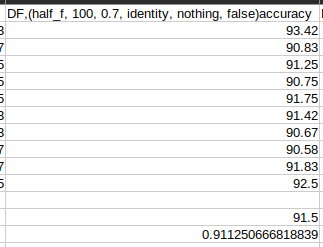

### SoleAudio
mfcc, delta, log energy append, half spectrogram 

    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,

    # spectrum
    frequency_range=Int[0, sr/2],
    spectrum_type=:power,

    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,

    # mfcc
    num_coeffs=13,
    normalization_type=:dithered,
    rectification=:log,
    log_energy_source=:mfcc,
    log_energy_pos=:replace,
    delta_window_length=9,
    delta_matrix=:transposed,

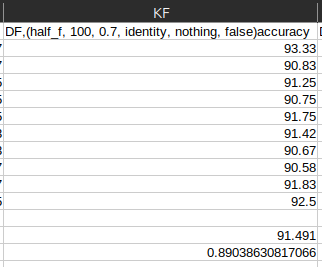

### SoleAudio
mfcc, delta, log energy append, half spectrogram 

    # fft
    window_norm=:true,

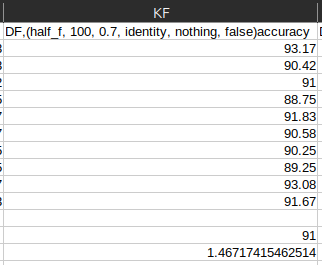

### SoleAudio
mfcc, delta, log energy append, half spectrogram 

    # mfcc
    log_energy_source=:standard,

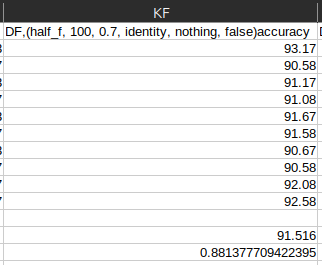

### SoleAudio
mfcc, delta, log energy append, half spectrogram 

    # mfcc
    log_energy_pos=:append,

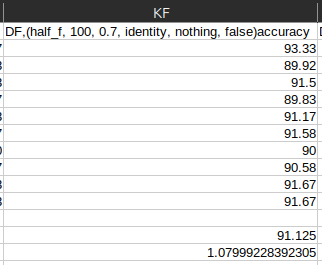

### SoleAudio
mfcc, delta, log energy append, half spectrogram 

    # mfcc
    delta_matrix=:standard,

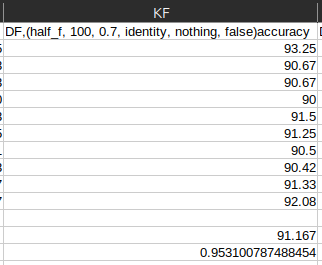